# Exercise 3
MG Becongco <br>
Fundamentals of Machine Learning <br>
Linear Regression

In [1]:
import seaborn as sns  
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv("survey.csv")
df2 = pd.read_csv("steps.csv", delimiter=";")
step_col_count = df2.shape[1]
print('Steps column count: '+str(step_col_count))
df2['MeanSteps'] = df2.iloc[:, 1:step_col_count].mean(axis=1, skipna = True) #compute for mean steps before merging
df2.head()

Steps column count: 329


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,MeanSteps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [2]:
df = pd.merge(df1, df2, on = 'id')  # merge data
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,MeanSteps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [3]:
df3 = df[["id","city","gender","age","education_1","education","hh_size","height","weight", "MeanSteps"]] # create new dataframe dropping steps columns
#df3["MeanSteps"].astype(int)  # Ensure that steps data is an float value
df3.head()

,id,city,gender,age,education_1,education,hh_size,height,weight,MeanSteps
0,1,Bordeaux,Male,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,Bachelor,3,1,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,Bachelor,1,1,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,Bachelor,4,3,167.0,61.0,5312.129630


 Dependent variable Y=Mean Steps <br>
 Potential Independent variable X=Gender, Height, Weight,Education <br>

In [4]:
# cleanup data
df4 = df3.drop(df[df3.MeanSteps  > 100000].index)  # Remove impossible values
df4.dropna() 
df4.reset_index()
df4.head()
df4 =df4[~df4.isin([np.nan, np.inf, -np.inf]).any(1)]

Exploratory data analysis below: <br>
An analysis of mean steps per participant: <br>
Graphs of the distribution below: LinePlot (e.g., histogram, box plot, density plot, violin plot) <br>

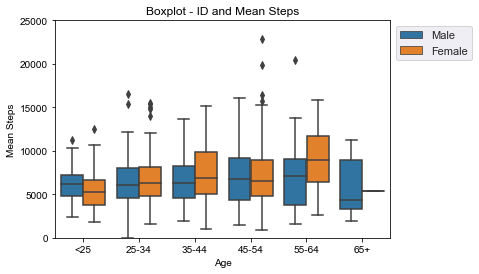

In [5]:
# mean steps per participant --> Graph of the distribution: BoxPlot
a = sns.boxplot(x="age", y="MeanSteps", hue="gender", order=["<25","25-34","35-44","45-54","55-64","65+"], data=df4)
a = (a.set(ylim=(0,25000)))
sns.set(rc={"figure.figsize":(13, 9)}) 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.title('Boxplot - ID and Mean Steps')
plt.show(a)

Boxplot shows the following:<br> 
1. Females in the age of 55-64 has a mean steps higher than the rest of the age groups and gender. Though there are some outliers in the Female age group of 24-34 that has mean steps as high as the females in age group 55-64 <br>
2. Ages "<25" has mean steps that are much similar to both gender with male median steps higher than the female median steps. <br>

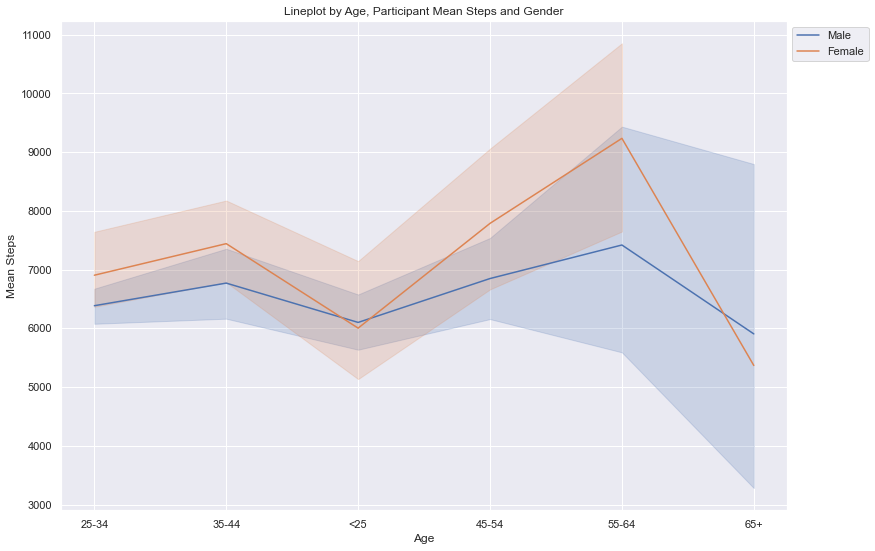

In [6]:
# lineplot
sns.lineplot(x="age", y="MeanSteps",hue="gender", data=df4)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Lineplot by Age, Participant Mean Steps and Gender')
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show()

Lineplot indicates that the participants in the female group in the age group of "55-64" has the highest mean steps, and the lowest mean steps at the "<25" age group. The mean steps for all the groups are in between 4000 and 10000 steps. 

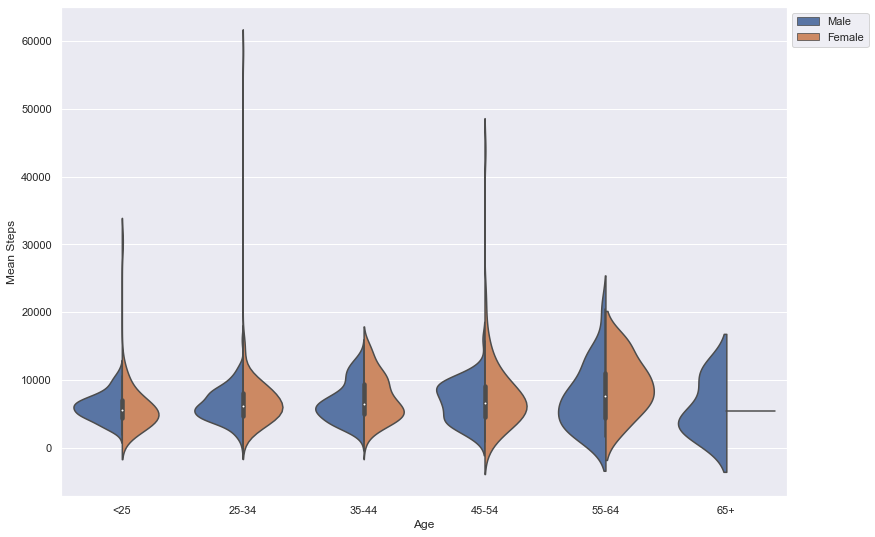

In [7]:
# violin plot
sns.violinplot(data=df4, x="age", y="MeanSteps", hue="gender",split=True, linewidth=1.5, order=["<25","25-34","35-44","45-54","55-64","65+"])
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show()


The median of the median steps for age group 55-64 is the highest among all age groups. <br>
The distribution of the mean steps for the all the age group indicates that values are highly concentrated around the median.

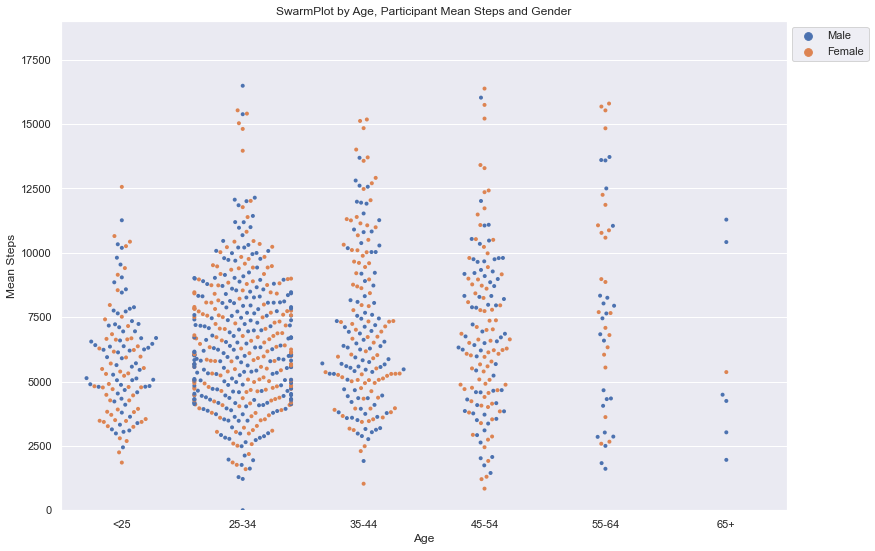

In [8]:
e = sns.swarmplot(x="age", y="MeanSteps", hue="gender", order=["<25","25-34","35-44","45-54","55-64","65+"], size=4, data=df4)
e = (e.set(ylim=(0,19000)))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('SwarmPlot by Age, Participant Mean Steps and Gender')
plt.xlabel("Age")
plt.ylabel("Mean Steps")
plt.show(e)

Participants mean steps data is highly concentrated for the age group 25-34 indicating high participation in that age group. Less participation seen for age group 65+ and the highest value of mean steps can be seen in age group 25-34.

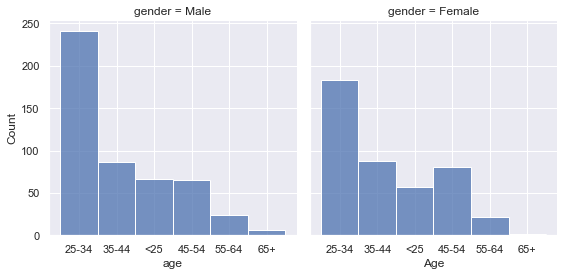

In [9]:
# distribution plot of df4
sns.displot(df4, x="age", col="gender", binwidth=3, height=4, facet_kws=dict(margin_titles=True), )
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show()

There are more participants the 25-34 age groups for both genders. 

Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)


In [10]:
#Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
print('Participant Mean Steps: '+str(df4.loc[:,"MeanSteps"].mean()))
print('Participant Median Steps: '+str(df4.loc[:,"MeanSteps"].median()))  
print('Participant Standard Deviation: '+str(df4.loc[:,"MeanSteps"].std())) 

Participant Mean Steps: 6827.731020401702
Participant Median Steps: 6245.006060606061
Participant Standard Deviation: 3701.9445472616435


Data distribution for tends to cluster in the median for all of the age groups regardles of gender. The age group 25-34 has the most participants. Though there are some outliers for groups up to 54. 

The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)


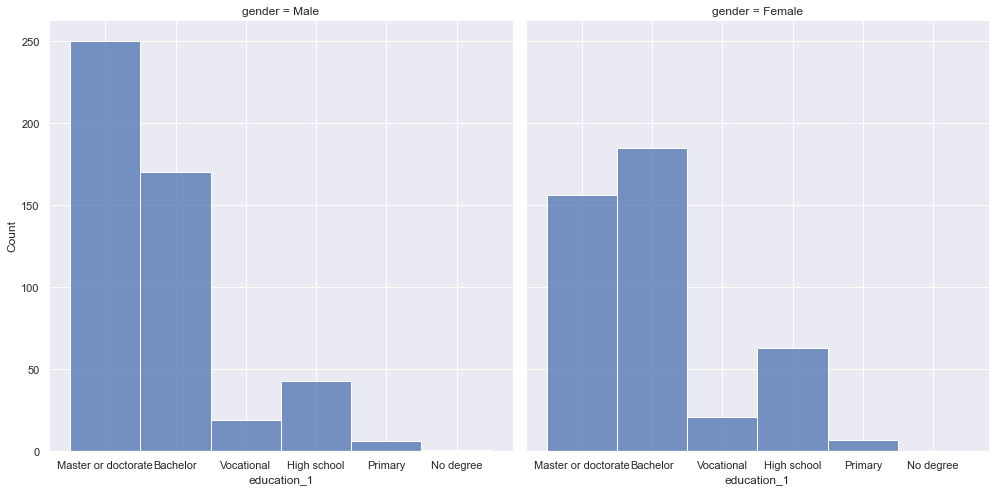

In [11]:
# distribution plot of Mean steps with reference to education and gender
sns.displot(df4, x="education_1", col="gender", binwidth=3, height=7, facet_kws=dict(margin_titles=True), )
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

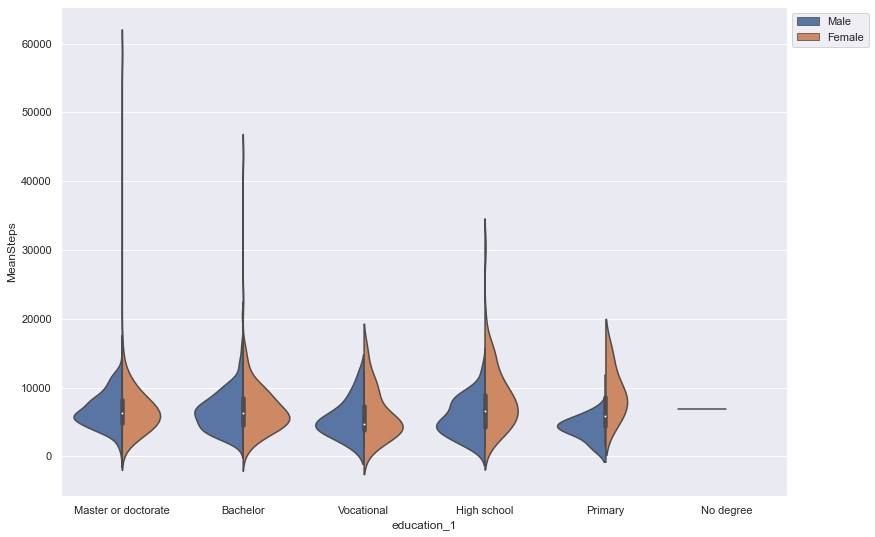

In [12]:
# violin plot of Mean steps with reference to education and gender
sns.violinplot(data=df4, x="education_1", y="MeanSteps", hue="gender",split=True, linewidth=1.5)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Highest user participation with Masters or Doctorate group for males, and bachelors for female. Data mostly congregate near the median except for the Primary education group. 

#Correlation <br>
(Start of exercise 2) <br>
Scatterplot matrix of the numerical variables <br>

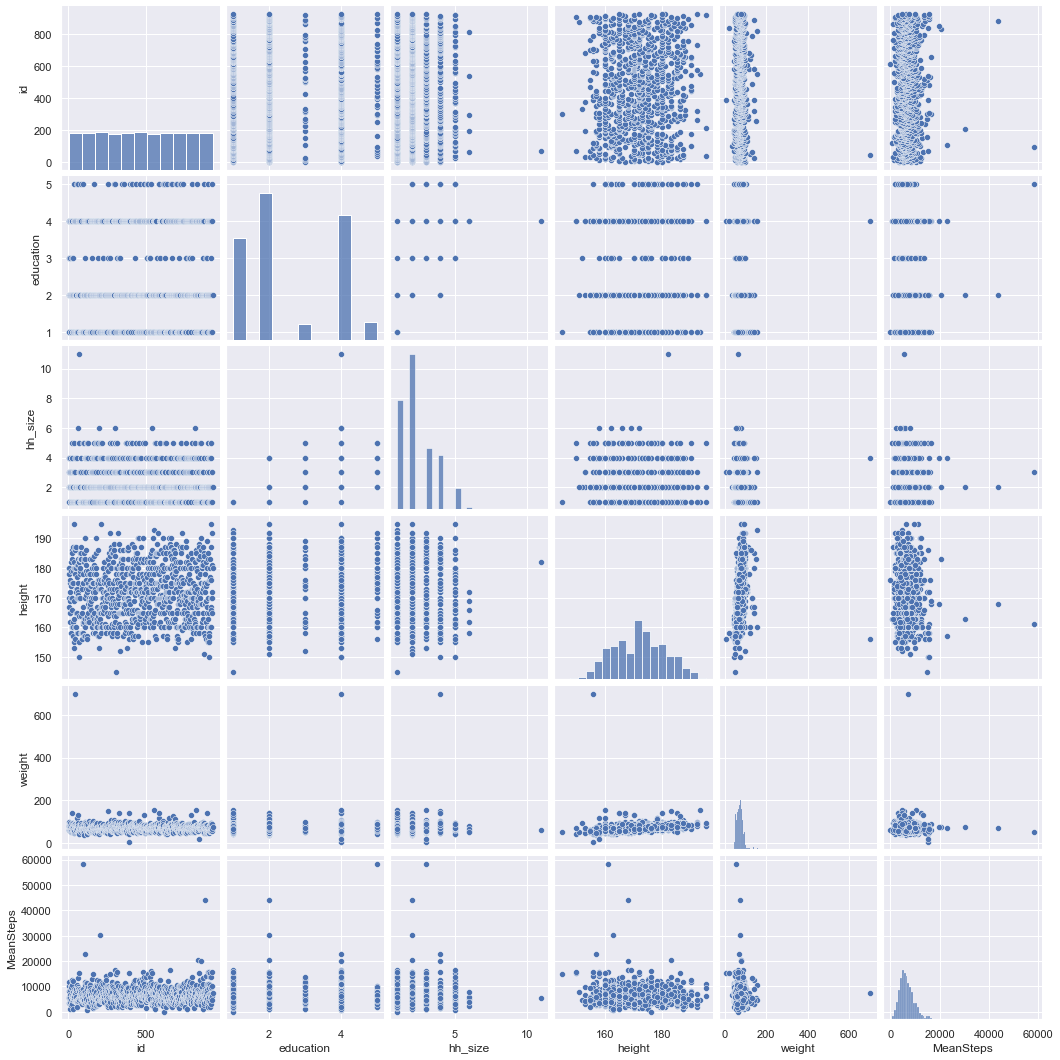

In [13]:
sns.pairplot(df4)
plt.show()

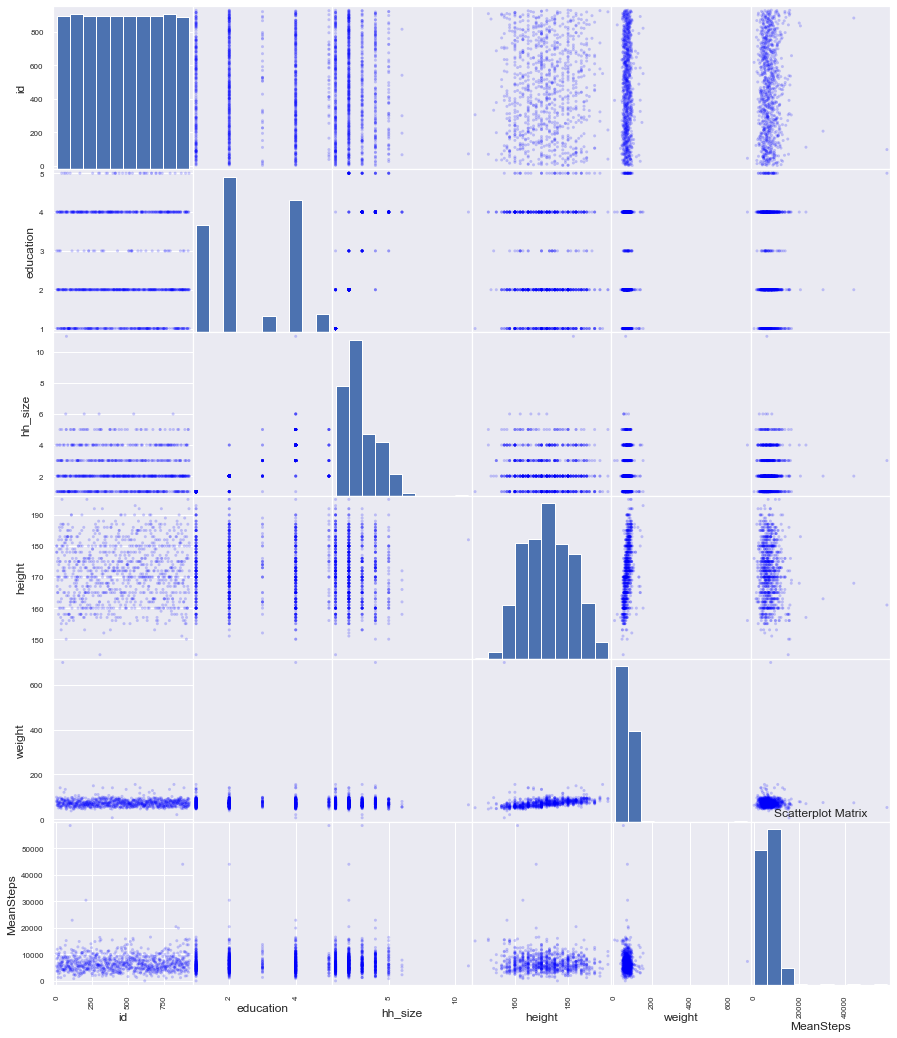

In [14]:
pd.plotting.scatter_matrix(df4, color='blue', diagonal='hist', figsize=(15,18), alpha=0.2, grid=True)
plt.title('Scatterplot Matrix')
plt.show()

Correlation matrix of the numerical variables <br>

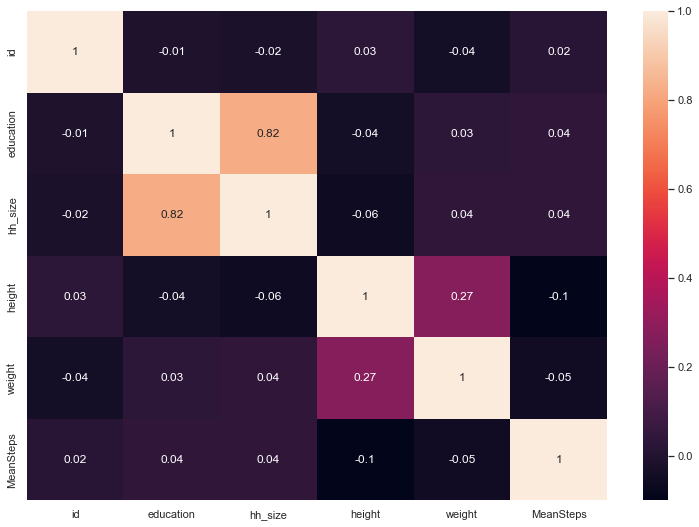

In [15]:
df4_corr_matrix = df4.corr().round(2)  #correlation matrix of the whole dataset df3
sns.heatmap(df4_corr_matrix, annot=True)
plt.show()

In [16]:
print('Matrix correlation of whole dataset')
df4_matrix=df4.corr()
df4_matrix=df4_matrix.unstack()
df4_matrix=df4_matrix[df4_matrix >0]
print(df4_matrix)

Matrix correlation of whole dataset
id         id           1.000000
           height       0.029991
           MeanSteps    0.019092
education  education    1.000000
           hh_size      0.824543
           weight       0.027998
           MeanSteps    0.041149
hh_size    education    0.824543
           hh_size      1.000000
           weight       0.035527
           MeanSteps    0.035782
height     id           0.029991
           height       1.000000
           weight       0.265176
weight     education    0.027998
           hh_size      0.035527
           height       0.265176
           weight       1.000000
MeanSteps  id           0.019092
           education    0.041149
           hh_size      0.035782
           MeanSteps    1.000000
dtype: float64


Describe and interpret the results <br>
Matrix Correlation: Both figures above and the heatmap indicates a high correlation between "education" and "hh_size". All other variables has a weak relationship with "steps" variable.

In [17]:
from scipy.stats.stats import pearsonr # correlation function 
print("Pearson's Correlation Coefficient: Education vs. Steps ")
r, p = pearsonr(df4_matrix['education'],df4_matrix['MeanSteps'])
print("The pearson correlation coefficient is:  "+ str(round(r,12)))
print("                        The p-value is:   "+ str("%.12f" % p))

Pearson's Correlation Coefficient: Education vs. Steps 
The pearson correlation coefficient is:  -0.570058250706
                        The p-value is:   0.429941749294


Education and number of Steps taken by a participant has a weak relationship or is not strongly correlated. <br>

# Start of Exercise 3 <br>
Predictive model <br>
Explain linear regression in your own words <br>
--> Linear regression tells us how well a set of data agrees with predicted linearity.

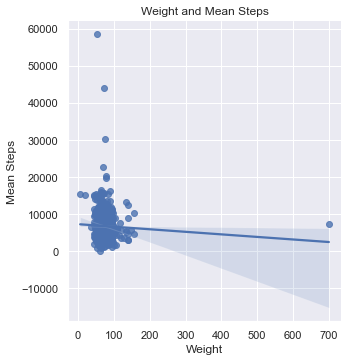

In [18]:
sns.lmplot(x='weight', y='MeanSteps', data=df4)
plt.title('Weight and Mean Steps')
plt.xlabel("Weight")
plt.ylabel("Mean Steps")
plt.show()

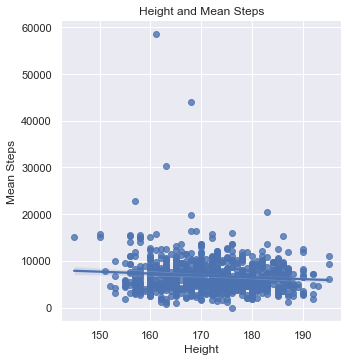

In [19]:
sns.lmplot(x='height', y='MeanSteps', data=df4)
plt.title('Height and Mean Steps')
plt.xlabel("Height")
plt.ylabel("Mean Steps")
plt.show()

Create dummy variables for the categorical variables <br>
Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).<br>

In [20]:
import sklearn as sk
import math
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#convert gender,city to dummy variable
df4_dummies = pd.get_dummies(df4, columns=['gender','city'], drop_first=True)
df4_dummies.info()
df4_dummies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 928
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                921 non-null    int64  
 1   age               921 non-null    object 
 2   education_1       921 non-null    object 
 3   education         921 non-null    int64  
 4   hh_size           921 non-null    int64  
 5   height            921 non-null    float64
 6   weight            921 non-null    float64
 7   MeanSteps         921 non-null    float64
 8   gender_Male       921 non-null    uint8  
 9   city_Lille        921 non-null    uint8  
 10  city_Lyon         921 non-null    uint8  
 11  city_Montpellier  921 non-null    uint8  
dtypes: float64(3), int64(3), object(2), uint8(4)
memory usage: 100.6+ KB


,id,age,education_1,education,hh_size,height,weight,MeanSteps,gender_Male,city_Lille,city_Lyon,city_Montpellier
0,1,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212,1,0,0,0
1,2,35-44,Bachelor,3,1,180.0,77.0,5687.423313,1,1,0,0
2,3,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730,1,0,0,1
3,4,<25,Bachelor,1,1,178.0,80.0,3633.200000,1,0,1,0
4,5,25-34,Bachelor,4,3,167.0,61.0,5312.129630,0,0,0,1


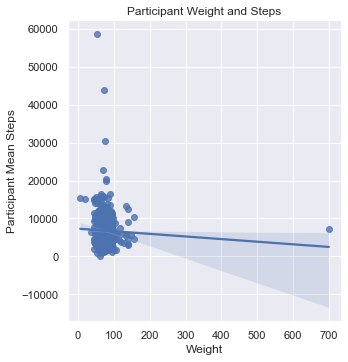

In [21]:
sns.lmplot(x='weight', y='MeanSteps', fit_reg=True, data=df4_dummies)
plt.title('Participant Weight and Steps')
plt.xlabel("Weight")
plt.ylabel("Participant Mean Steps")
plt.show()

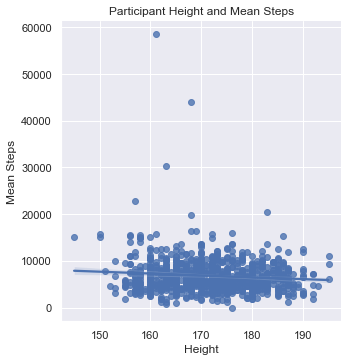

In [22]:
sns.lmplot(x='height', y='MeanSteps', fit_reg=True, data=df4_dummies)
plt.title('Participant Height and Mean Steps')
plt.xlabel("Height")
plt.ylabel("Mean Steps")
plt.show()

In [23]:
#df4_dummies.dropna()
#df4_dummies.reset_index()
import numpy as np
df4_dummies.replace([np.inf, -np.inf], np.nan, inplace=True)
x = df4_dummies[['weight']]  
y = df4_dummies['MeanSteps']  
lm = LinearRegression()  
lm.fit(x, y)  

df4_dummies['weight_p'] = lm.predict(x) #generate the predictions and add them to the dataframe
df4_dummies['resid'] = df4_dummies['weight'] - df4_dummies['weight_p'] #get the residuals 
df4_dummies.info()
df4_dummies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 928
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                921 non-null    int64  
 1   age               921 non-null    object 
 2   education_1       921 non-null    object 
 3   education         921 non-null    int64  
 4   hh_size           921 non-null    int64  
 5   height            921 non-null    float64
 6   weight            921 non-null    float64
 7   MeanSteps         921 non-null    float64
 8   gender_Male       921 non-null    uint8  
 9   city_Lille        921 non-null    uint8  
 10  city_Lyon         921 non-null    uint8  
 11  city_Montpellier  921 non-null    uint8  
 12  weight_p          921 non-null    float64
 13  resid             921 non-null    float64
dtypes: float64(5), int64(3), object(2), uint8(4)
memory usage: 115.0+ KB


,id,age,education_1,education,hh_size,height,weight,MeanSteps,gender_Male,city_Lille,city_Lyon,city_Montpellier,weight_p,resid
0,1,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212,1,0,0,0,6654.697182,-6556.697182
1,2,35-44,Bachelor,3,1,180.0,77.0,5687.423313,1,1,0,0,6799.198368,-6722.198368
2,3,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730,1,0,0,1,6757.912315,-6674.912315
3,4,<25,Bachelor,1,1,178.0,80.0,3633.200000,1,0,1,0,6778.555341,-6698.555341
4,5,25-34,Bachelor,4,3,167.0,61.0,5312.129630,0,0,0,1,6909.294510,-6848.294510


Evaluation<br>
Evaluate the model on the test data <br>
Predictive power of the model (R2, RMSE) <br>
Investigate the residuals <br>
Describe and interpret the results <br>

In [24]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df4_dummies[['weight']] 
y = df4_dummies['MeanSteps']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept
print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 7329.036 + -6.881X


The regression line is: $ y = 7082.233 + (-6.522)X $  <br>
Where x=height and y=Steps

In [25]:
df4_dummies['Steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df4_dummies.head(50)

,id,age,education_1,education,hh_size,height,weight,MeanSteps,gender_Male,city_Lille,city_Lyon,city_Montpellier,weight_p,resid,Steps_p
0,1,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212,1,0,0,0,6654.697182,-6556.697182,6654.697182
1,2,35-44,Bachelor,3,1,180.0,77.0,5687.423313,1,1,0,0,6799.198368,-6722.198368,6799.198368
2,3,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730,1,0,0,1,6757.912315,-6674.912315,6757.912315
3,4,<25,Bachelor,1,1,178.0,80.0,3633.200000,1,0,1,0,6778.555341,-6698.555341,6778.555341
4,5,25-34,Bachelor,4,3,167.0,61.0,5312.129630,0,0,0,1,6909.294510,-6848.294510,6909.294510
5,6,35-44,Vocational,1,1,170.0,63.0,11908.509804,1,1,0,0,6895.532492,-6832.532492,6895.532492
6,7,25-34,Master or doctorate,2,2,175.0,75.0,4715.400000,1,0,0,1,6812.960386,-6737.960386,6812.960386
7,8,25-34,Master or doctorate,4,3,165.0,88.0,3594.051724,0,0,0,0,6723.507270,-6635.507270,6723.507270
8,9,35-44,Vocational,4,4,172.0,69.0,8626.707965,0,1,0,0,6854.246439,-6785.246439,6854.246439
9,10,25-34,Master or doctorate,2,2,165.0,93.0,3787.043478,0,1,0,0,6689.102226,-6596.102226,6689.102226


In [26]:
df4_dummies["resid"] = df4_dummies["MeanSteps"] - df4_dummies["Steps_p"]
df4_dummies.head()

,id,age,education_1,education,hh_size,height,weight,MeanSteps,gender_Male,city_Lille,city_Lyon,city_Montpellier,weight_p,resid,Steps_p
0,1,25-34,Master or doctorate,4,4,178.0,98.0,10205.521212,1,0,0,0,6654.697182,3550.824031,6654.697182
1,2,35-44,Bachelor,3,1,180.0,77.0,5687.423313,1,1,0,0,6799.198368,-1111.775055,6799.198368
2,3,25-34,Master or doctorate,2,2,180.0,83.0,8301.729730,1,0,0,1,6757.912315,1543.817415,6757.912315
3,4,<25,Bachelor,1,1,178.0,80.0,3633.200000,1,0,1,0,6778.555341,-3145.355341,6778.555341
4,5,25-34,Bachelor,4,3,167.0,61.0,5312.129630,0,0,0,1,6909.294510,-1597.164880,6909.294510


## Evaluating the model ##

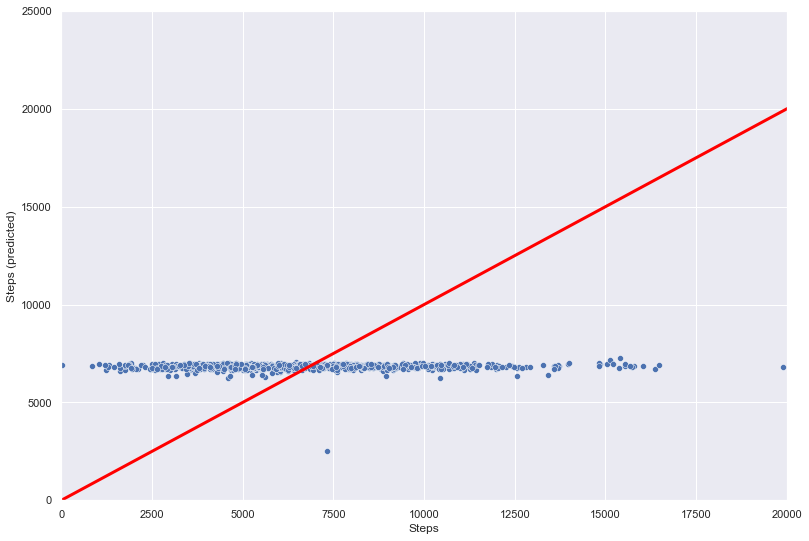

In [27]:
residual = df4_dummies['Steps_p'] - df4_dummies['MeanSteps'] #Subtracting Y'-Y (Y' = predicted) gets us the residual
sns.scatterplot(x='MeanSteps',y='Steps_p',data=df4_dummies)
plt.xlim(0, 20000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 25000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Steps')
plt.ylabel('Steps (predicted)')
plt.show()

In [28]:
r2_score(df4_dummies['MeanSteps'], df4_dummies['Steps_p'])

0.0023282419735687343

In [29]:
math.sqrt(mean_squared_error(df4_dummies['MeanSteps'], df4_dummies['Steps_p'])) #this gives the model fit (R2) for the Y and predicted Y

3695.624578472246